In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, explained_variance_score,mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
import itertools
import statsmodels.api as sm
import matplotlib.dates as mdates
from keras.optimizers import SGD

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
qdata = pd.read_csv('climate_data.csv')

In [4]:
df = qdata

In [5]:
qdata.shape

(1683, 10)

In [6]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees
0,01/09/2016,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9
1,02/09/2016,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9
2,03/09/2016,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7
3,04/09/2016,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3
4,05/09/2016,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1


In [7]:
qdata.dtypes

Date                                                    object
Mean_air_temperature_degC                              float64
Minimum_air_temperature_degC                           float64
Maximum_air_temperature_degC                           float64
Rainfall_mm                                            float64
Air_pressure_mbar                                      float64
Solar_radiation_kW_per_m2                              float64
Photosynthetic.active.radiation_umol_per_m2_per_sec    float64
Wind_speed_m_per_sec                                   float64
Wind_direction_degrees                                 float64
dtype: object

In [8]:
qdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 1683 non-null   object 
 1   Mean_air_temperature_degC                            1683 non-null   float64
 2   Minimum_air_temperature_degC                         1683 non-null   float64
 3   Maximum_air_temperature_degC                         1683 non-null   float64
 4   Rainfall_mm                                          1683 non-null   float64
 5   Air_pressure_mbar                                    1683 non-null   float64
 6   Solar_radiation_kW_per_m2                            1683 non-null   float64
 7   Photosynthetic.active.radiation_umol_per_m2_per_sec  1683 non-null   float64
 8   Wind_speed_m_per_sec                                 1683 non-null  

In [9]:
qdata['Minimum_air_temperature_degC'].min()

-9.7

In [10]:
qdata['Rainfall_mm'].min()

-9999.0

In [11]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees
0,01/09/2016,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9
1,02/09/2016,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9
2,03/09/2016,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7
3,04/09/2016,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3
4,05/09/2016,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1


In [12]:
qdata['Date'].max()

'31/12/2021'

In [13]:
### Data Cleaning

In [14]:
qdata['Year'] = pd.DatetimeIndex(qdata['Date']).year
qdata['Month'] = pd.DatetimeIndex(qdata['Date']).month
qdata['Day'] = pd.DatetimeIndex(qdata['Date']).day

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  d

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '28/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '29/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '30/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31/03/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  d

In [15]:
qdata[qdata['Year']==2018]

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
487,04/01/2018,3.4,1.5,7.4,-9999.0,742.4,0.020,31.3,5.3,203.8,2018,4,1
488,05/01/2018,1.6,0.5,2.8,-9999.0,744.4,0.031,50.6,1.9,215.2,2018,5,1
489,06/01/2018,0.7,-0.8,1.7,-9999.0,758.9,0.015,27.7,4.5,168.5,2018,6,1
490,07/01/2018,-1.0,-2.3,0.3,-9999.0,769.9,0.061,101.7,3.4,29.3,2018,7,1
491,08/01/2018,-1.6,-2.3,-0.8,-9999.0,765.1,0.025,42.2,16.5,77.7,2018,8,1
492,09/01/2018,0.5,-1.1,3.8,-9999.0,752.7,0.007,18.3,-9999.0,210.8,2018,9,1
493,10/01/2018,3.8,2.3,5.0,-9999.0,752.9,0.043,68.4,1.9,174.1,2018,10,1
494,11/01/2018,1.5,-0.3,2.2,-9999.0,763.9,0.019,27.0,1.4,229.3,2018,11,1
495,12/01/2018,1.8,0.6,4.0,-9999.0,766.2,0.050,85.2,3.7,138.0,2018,12,1
496,13/01/2018,2.6,2.0,3.2,-9999.0,761.1,0.000,12.0,5.0,121.9,2018,1,13


In [16]:
qdata['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
qdata['Day'].unique()

array([ 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 10, 31, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8],
      dtype=int64)

In [18]:
qdata['Rainfall_mm'] = qdata['Rainfall_mm'].apply(lambda x: x if x >= 0 else pd.NA)
qdata['Wind_speed_m_per_sec'] = qdata['Wind_speed_m_per_sec'].apply(lambda x: x if x >= 0 else pd.NA)
qdata['Air_pressure_mbar'] = qdata['Air_pressure_mbar'].apply(lambda x: x if x >= 0 else pd.NA)
qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'] = qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'].apply(lambda x: x if x >= 0 else pd.NA)
qdata['Wind_direction_degrees'] = qdata['Wind_direction_degrees'].apply(lambda x: x if x >= 0 else pd.NA)

In [19]:
qdata=qdata.fillna(0)

In [20]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
0,01/09/2016,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9,2016,1,9
1,02/09/2016,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9,2016,2,9
2,03/09/2016,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7,2016,3,9
3,04/09/2016,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3,2016,4,9
4,05/09/2016,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1,2016,5,9


In [21]:
for i in range(12):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day


In [22]:
qdata[['Date','Month','Day']]

,Date,Month,Day
0,01/09/2016,9,1
1,02/09/2016,9,2
2,03/09/2016,9,3
3,04/09/2016,9,4
4,05/09/2016,9,5
5,06/09/2016,9,6
6,07/09/2016,9,7
7,08/09/2016,9,8
8,09/09/2016,9,9
9,10/09/2016,9,10


In [23]:
for i in range(30,42):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day


In [24]:
for i in range(61,73):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [25]:
for i in range(91,102):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [26]:
for i in range(122,134):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [27]:
for i in range(153,165):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [28]:
for i in range(181,193):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [29]:
for i in range(212,224):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [30]:
for i in range(242,254):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [31]:
for i in range(273,285):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [32]:
for i in range(303,315):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [33]:
for i in range(334,346):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [34]:
for i in range(365,377):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [35]:
for i in range(395,407):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [36]:
for i in range(426,438):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [37]:
for i in range(456,467):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [38]:
for i in range(487,496):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [39]:
for i in range(515,527):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [40]:
for i in range(543,555):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [41]:
for i in range(587,599):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [42]:
for i in range(618,630):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [43]:
for i in range(646,658):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [44]:
for i in range(677,689):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [45]:
for i in range(707,719):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [46]:
for i in range(738,750):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [47]:
for i in range(768,780):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [48]:
for i in range(799,811):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [49]:
for i in range(830,842):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [50]:
for i in range(891,903):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [51]:
for i in range(921,932):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [52]:
for i in range(952,964):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [53]:
for i in range(983,995):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [54]:
for i in range(1012,1024):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [55]:
for i in range(1043,1054):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [56]:
for i in range(1043,1055):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [57]:
for i in range(1073,1085):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [58]:
for i in range(1104,1116):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [59]:
for i in range(1134,1146):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [60]:
for i in range(1165,1177):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [61]:
for i in range(1196,1208):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [62]:
for i in range(1226,1238):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [63]:
for i in range(1257,1269):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [64]:
for i in range(1287,1298):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [65]:
for i in range(1318,1330):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [66]:
for i in range(1349,1361):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [67]:
for i in range(1377,1389):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [68]:
for i in range(1408,1420):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [69]:
for i in range(1438,1450):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [70]:
for i in range(1469,1481):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [71]:
for i in range(1499,1511):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [72]:
for i in range(1530,1542):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [73]:
for i in range(1561,1573):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [74]:
for i in range(1591,1603):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [75]:
for i in range(1622,1634):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [76]:
for i in range(1652,1663):
    temp_day = qdata.loc[i, 'Day']
    qdata.loc[i, 'Day'] = qdata.loc[i, 'Month']
    qdata.loc[i, 'Month'] = temp_day

In [77]:
qdata.drop(['Date'],axis=1,inplace=True)

In [78]:
qdata['Date'] = pd.to_datetime(qdata[['Year', 'Month', 'Day']])

date_column = qdata['Date']
qdata.drop(columns=['Date'], inplace=True)
qdata.insert(0, 'Date', date_column)

# Set 'Date' as the DataFrame index
#qdata.set_index('Date', inplace=True)

In [79]:
qdata.describe()

,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,7.337433,5.077540,9.855258,1.021153,760.506358,0.098617,204.405466,3.500832,195.818895,2018.940582,6.636958,15.790255
std,4.749671,4.408283,5.349580,3.227731,8.659631,0.078040,178.789050,3.051757,63.906533,1.631668,3.598056,8.753289
min,-7.700000,-9.700000,-5.900000,0.000000,729.800000,0.000000,0.000000,0.000000,19.400000,2016.000000,1.000000,1.000000
25%,3.800000,1.600000,5.900000,0.000000,755.000000,0.037000,61.350000,2.200000,166.650000,2017.000000,3.000000,8.000000
50%,7.100000,4.900000,9.300000,0.000000,761.700000,0.075000,142.100000,3.100000,203.200000,2019.000000,7.000000,16.000000
75%,10.950000,8.500000,13.600000,0.000000,766.500000,0.147500,309.800000,4.200000,232.150000,2020.000000,10.000000,23.000000
max,21.800000,18.400000,26.900000,32.800000,782.900000,0.342000,771.400000,72.800000,352.900000,2021.000000,12.000000,31.000000


In [80]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
0,2016-09-01,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9,2016,9,1
1,2016-09-02,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9,2016,9,2
2,2016-09-03,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7,2016,9,3
3,2016-09-04,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3,2016,9,4
4,2016-09-05,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1,2016,9,5


In [81]:
# Create a continuous time index that covers the entire date range
#start_date = qdata.index.min()
#end_date = qdata.index.max()
#time_index = pd.date_range(start=start_date, end=end_date, freq='D')

In [82]:
# Reindex the DataFrame with the continuous time index
#qdata = qdata.reindex(time_index)

In [83]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
0,2016-09-01,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9,2016,9,1
1,2016-09-02,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9,2016,9,2
2,2016-09-03,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7,2016,9,3
3,2016-09-04,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3,2016,9,4
4,2016-09-05,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1,2016,9,5


In [84]:
# Convert 'Date' to datetime if not already done.
#qdata['Date'] = pd.to_datetime(qdata['Date'])

# Set 'Date' as the DataFrame index
qdata.set_index('Date', inplace=True)

# Create a continuous time index that covers the entire date range
start_date = qdata.index.min()
end_date = qdata.index.max()
time_index = pd.date_range(start=start_date, end=end_date, freq='D')  # 'D' for daily frequency

In [85]:
duplicates = qdata.index.duplicated()
qdata[duplicates]

,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
Date,,,,,,,,,,,,
2019-01-10,9.2,3.9,12.3,0.0,751.8,0.043,77.5,2.9,149.6,2019,1,10
2019-02-10,5.7,3.5,9.2,0.0,764.0,0.117,242.0,1.6,280.6,2019,2,10
2019-03-10,6.5,2.9,10.8,0.0,759.1,0.062,115.8,3.7,147.1,2019,3,10
2019-04-10,9.8,8.8,12.5,0.0,753.7,0.076,145.2,3.0,137.4,2019,4,10
2019-05-10,9.6,8.4,10.7,0.0,759.4,0.036,62.3,3.2,111.8,2019,5,10
2019-06-10,9.2,7.8,11.0,0.0,758.9,0.073,144.4,2.9,232.7,2019,6,10
2019-07-10,9.4,7.1,12.4,0.0,757.9,0.050,96.7,4.4,176.1,2019,7,10
2019-08-10,8.9,7.3,10.7,0.0,752.4,0.108,223.8,5.0,211.6,2019,8,10
2019-09-10,7.3,6.2,9.3,0.0,751.8,0.085,162.8,3.9,217.2,2019,9,10


In [86]:
qdata = qdata[~duplicates]

In [87]:
qdata.reset_index(inplace=True)

In [88]:
#qdata = qdata.reindex(time_index)

In [89]:
qdata.head()

,Date,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
0,2016-09-01,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9,2016,9,1
1,2016-09-02,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9,2016,9,2
2,2016-09-03,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7,2016,9,3
3,2016-09-04,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3,2016,9,4
4,2016-09-05,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1,2016,9,5


In [90]:
qdata.shape

(1662, 13)

In [91]:
# Forward fill missing values
qdata['Rainfall_mm'] = qdata['Rainfall_mm'].fillna(method='ffill')
qdata['Year'] = pd.DatetimeIndex(qdata['Date']).year
qdata['Month'] = pd.DatetimeIndex(qdata['Date']).month
qdata['Day'] = pd.DatetimeIndex(qdata['Date']).day
qdata['Mean_air_temperature_degC'] = qdata['Mean_air_temperature_degC'].fillna(method='ffill')
qdata['Minimum_air_temperature_degC'] = qdata['Minimum_air_temperature_degC'].fillna(method='ffill')
qdata['Maximum_air_temperature_degC'] = qdata['Maximum_air_temperature_degC'].fillna(method='ffill')
qdata['Air_pressure_mbar'] = qdata['Air_pressure_mbar'].fillna(method='ffill')
qdata['Solar_radiation_kW_per_m2'] = qdata['Solar_radiation_kW_per_m2'].fillna(method='ffill')
qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'] = qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'].fillna(method='ffill')
qdata['Wind_speed_m_per_sec'] = qdata['Wind_speed_m_per_sec'].fillna(method='ffill')
qdata['Wind_direction_degrees'] = qdata['Wind_direction_degrees'].fillna(method='ffill')

In [92]:
qdata.isnull().sum()

Date                                                   0
Mean_air_temperature_degC                              0
Minimum_air_temperature_degC                           0
Maximum_air_temperature_degC                           0
Rainfall_mm                                            0
Air_pressure_mbar                                      0
Solar_radiation_kW_per_m2                              0
Photosynthetic.active.radiation_umol_per_m2_per_sec    0
Wind_speed_m_per_sec                                   0
Wind_direction_degrees                                 0
Year                                                   0
Month                                                  0
Day                                                    0
dtype: int64

In [93]:
df = qdata

In [94]:
##EDA

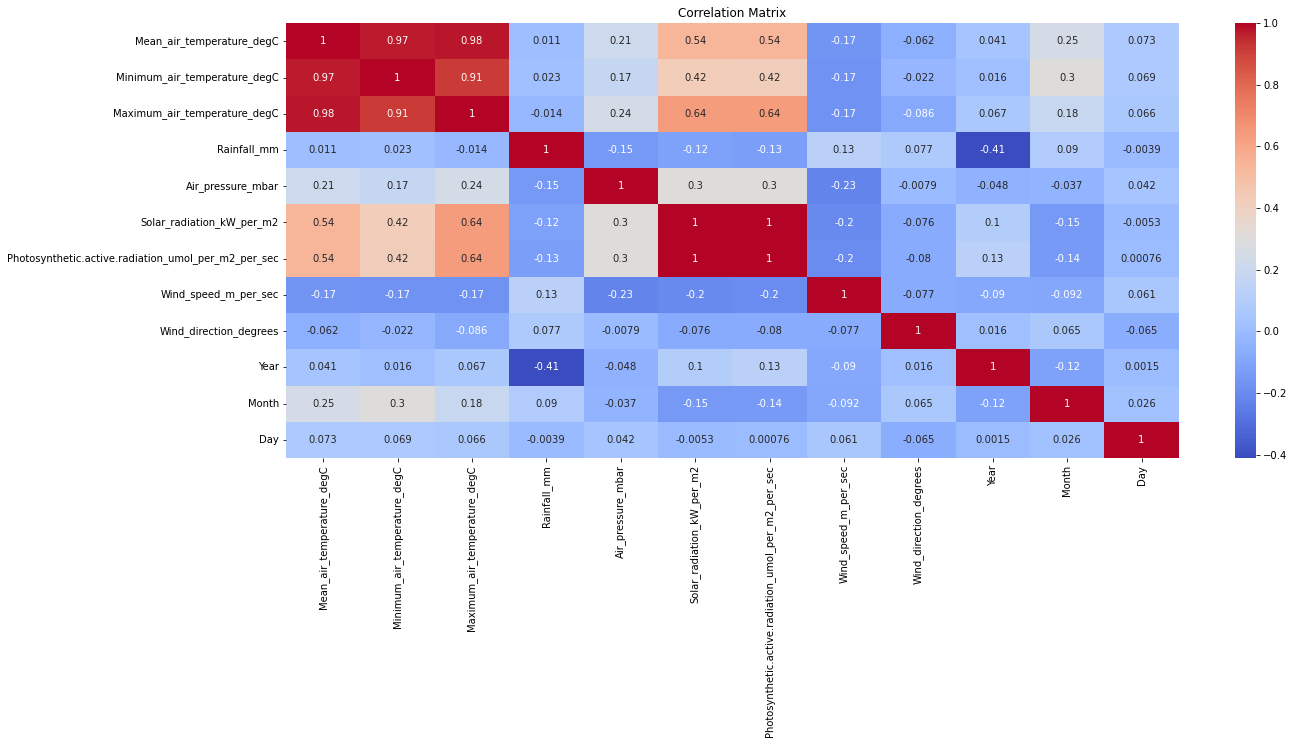

In [95]:

plt.figure(figsize=(20,8))

corr_matrix = qdata.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

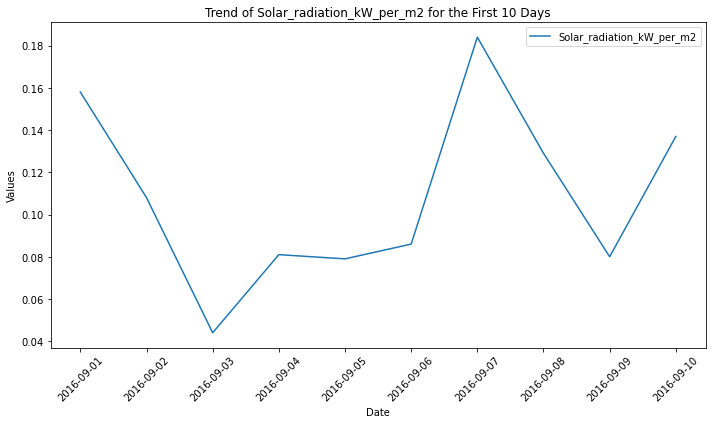

In [96]:
# Convert 'Date' column to datetime type
qdata['Date'] = pd.to_datetime(qdata['Date'])


variables_to_plot = ['Solar_radiation_kW_per_m2']

plt.figure(figsize=(10, 6))
for variable in variables_to_plot:
    plt.plot(qdata['Date'][:10], qdata[variable][:10], label=variable)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend of Solar_radiation_kW_per_m2 for the First 10 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

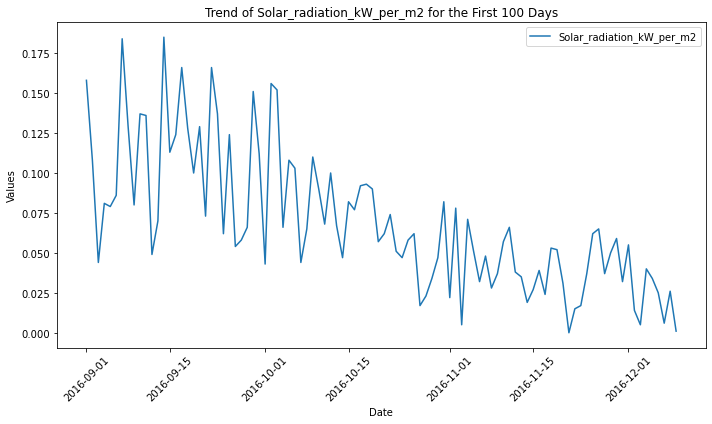

In [97]:
# Convert 'Date' column to datetime type
qdata['Date'] = pd.to_datetime(qdata['Date'])

# Plot the trend for all variables except minimum and maximum temperature
variables_to_plot = ['Solar_radiation_kW_per_m2']

plt.figure(figsize=(10, 6))
for variable in variables_to_plot:
    plt.plot(qdata['Date'][:100], qdata[variable][:100], label=variable)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend of Solar_radiation_kW_per_m2 for the First 100 Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

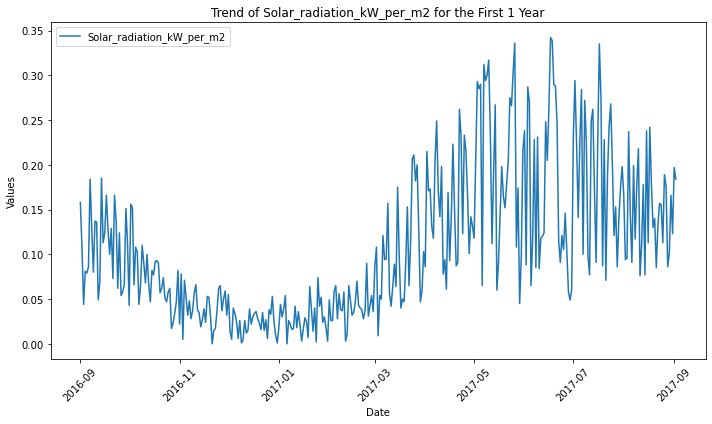

In [98]:
# Convert 'Date' column to datetime type
qdata['Date'] = pd.to_datetime(qdata['Date'])

# Plot the trend for all variables except minimum and maximum temperature
variables_to_plot = ['Solar_radiation_kW_per_m2']

plt.figure(figsize=(10, 6))
for variable in variables_to_plot:
    plt.plot(qdata['Date'][:367], qdata[variable][:367], label=variable)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Trend of Solar_radiation_kW_per_m2 for the First 1 Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1440x576 with 0 Axes>

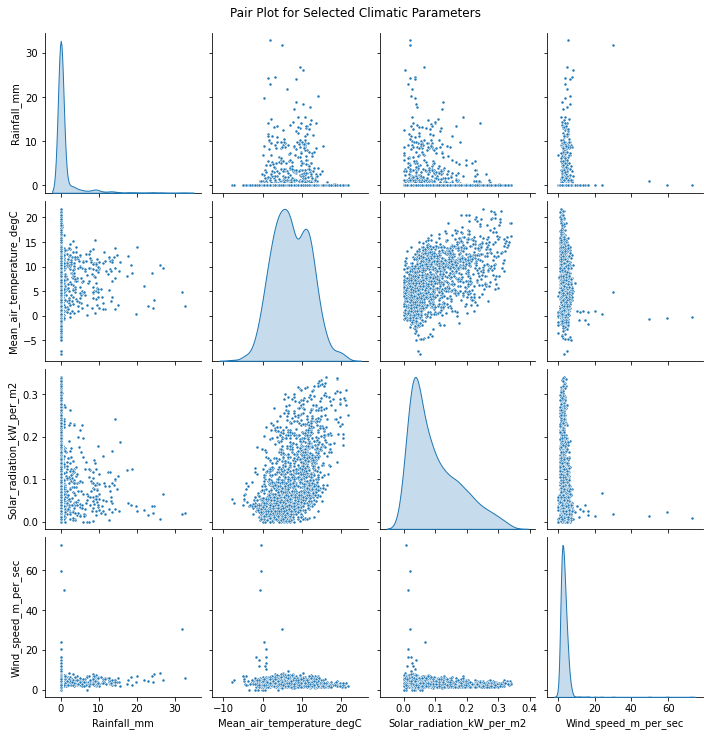

In [99]:
# Scatter plots between rainfall and other climatic parameters
plt.figure(figsize=(20,8))

# Pair plot for selected climatic parameters
selected_params = ['Rainfall_mm', 'Mean_air_temperature_degC', 'Solar_radiation_kW_per_m2', 'Wind_speed_m_per_sec']
sns.pairplot(qdata[selected_params], diag_kind='kde', markers='.')
plt.suptitle('Pair Plot for Selected Climatic Parameters', y=1.02)
plt.show()

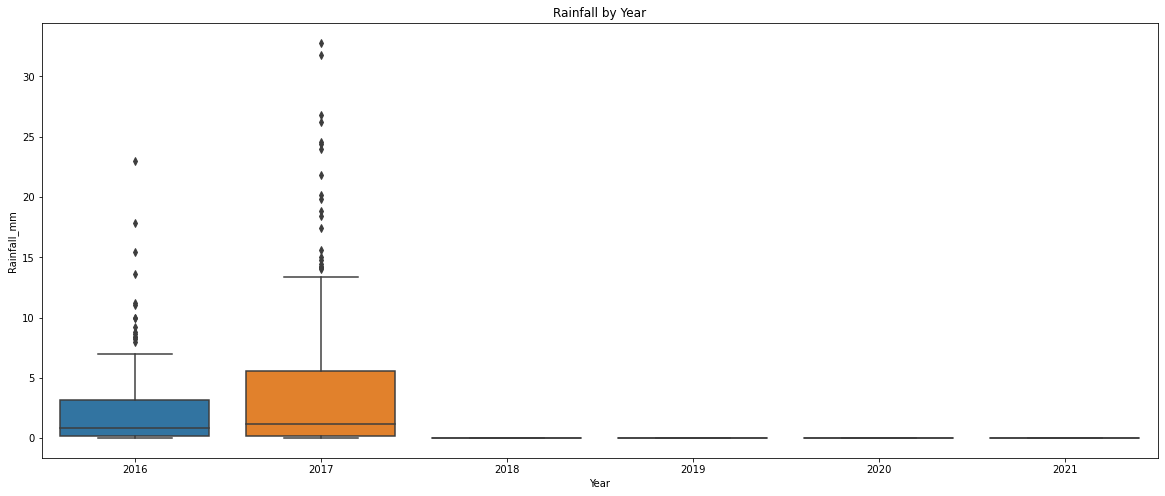

In [100]:
# Box plot of Rainfall by year
plt.figure(figsize=(20,8))

sns.boxplot(x='Year', y='Rainfall_mm', data=qdata)
plt.title('Rainfall by Year')
plt.show()

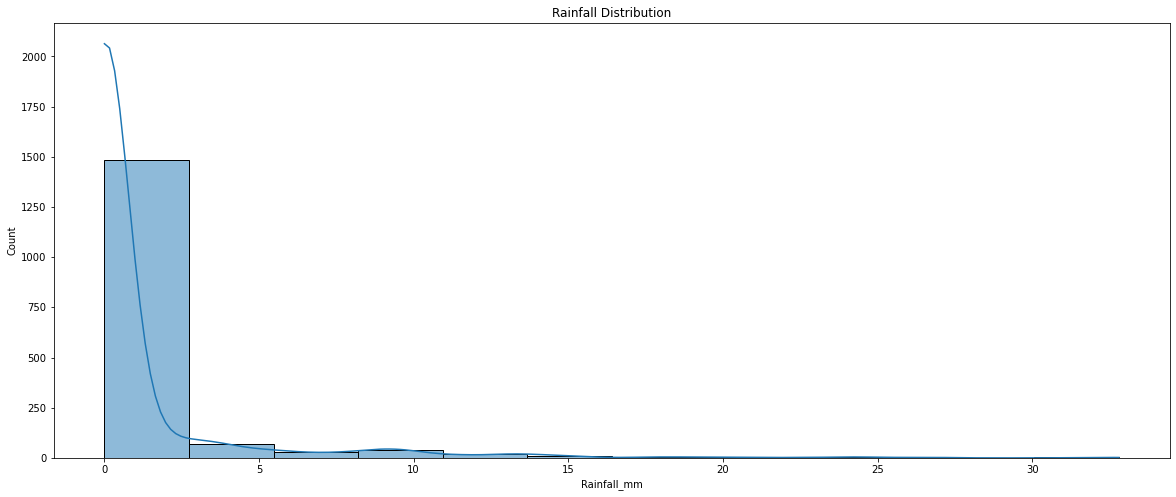

In [101]:
plt.figure(figsize=(20,8))



# Histogram of Rainfall
sns.histplot(qdata['Rainfall_mm'], kde=True)
plt.title('Rainfall Distribution')
plt.show()

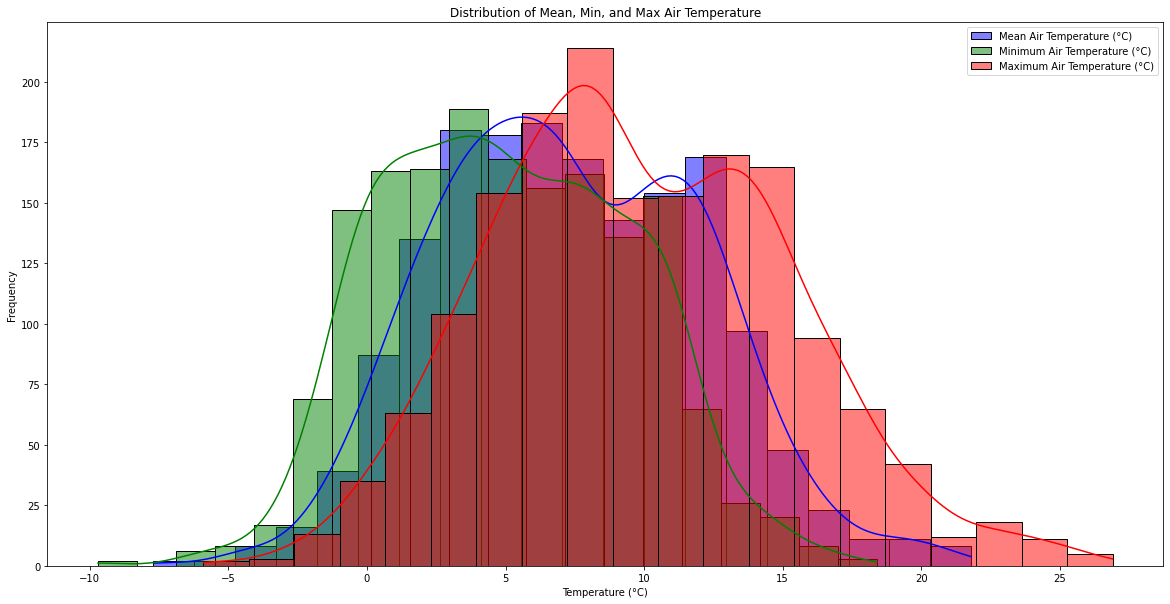

In [102]:
# Histograms for each climatic parameter
plt.figure(figsize=(20, 10))
sns.histplot(qdata['Mean_air_temperature_degC'], bins=20, kde=True, color='blue', label='Mean Air Temperature (°C)')
sns.histplot(qdata['Minimum_air_temperature_degC'], bins=20, kde=True, color='green', label='Minimum Air Temperature (°C)')
sns.histplot(qdata['Maximum_air_temperature_degC'], bins=20, kde=True, color='red', label='Maximum Air Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean, Min, and Max Air Temperature')
plt.legend()
plt.show()

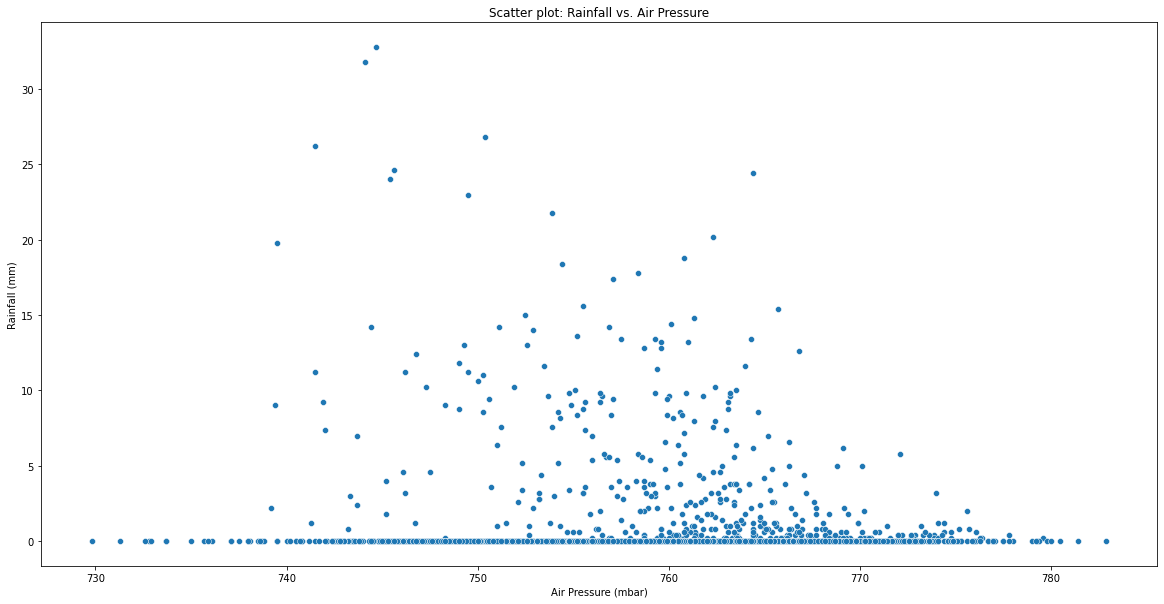

In [103]:
# Scatter plot between Rainfall and Air Pressure
plt.figure(figsize=(20,10))
sns.scatterplot(x='Air_pressure_mbar', y='Rainfall_mm', data=qdata)
plt.xlabel('Air Pressure (mbar)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatter plot: Rainfall vs. Air Pressure')
plt.show()


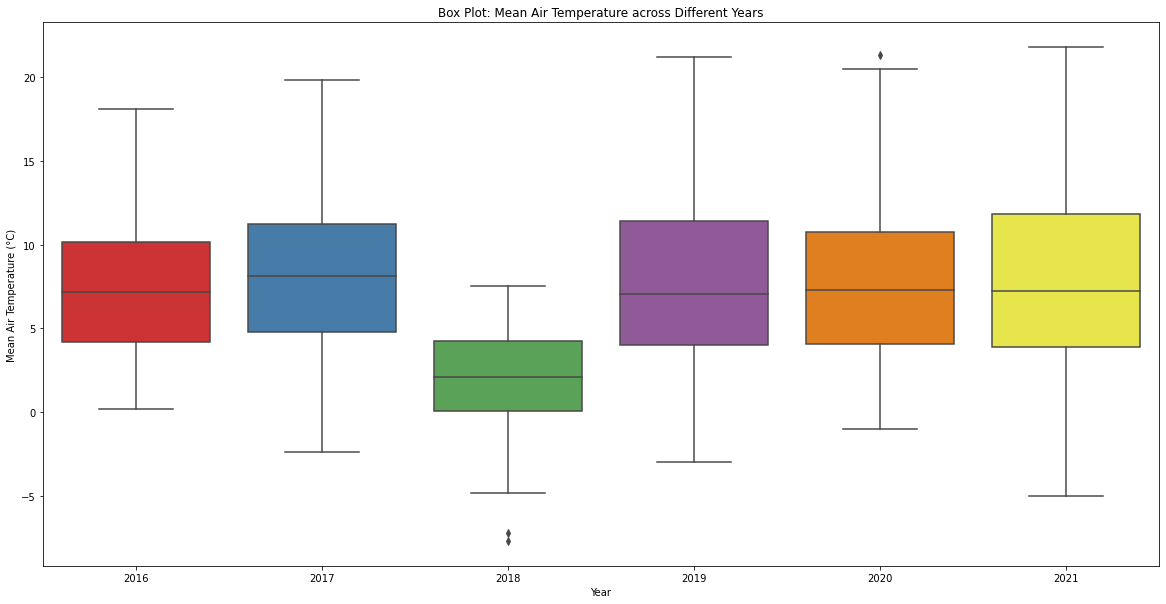

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year', y='Mean_air_temperature_degC', data=qdata, palette='Set1')
plt.xlabel('Year')
plt.ylabel('Mean Air Temperature (°C)')
plt.title('Box Plot: Mean Air Temperature across Different Years')
plt.show()

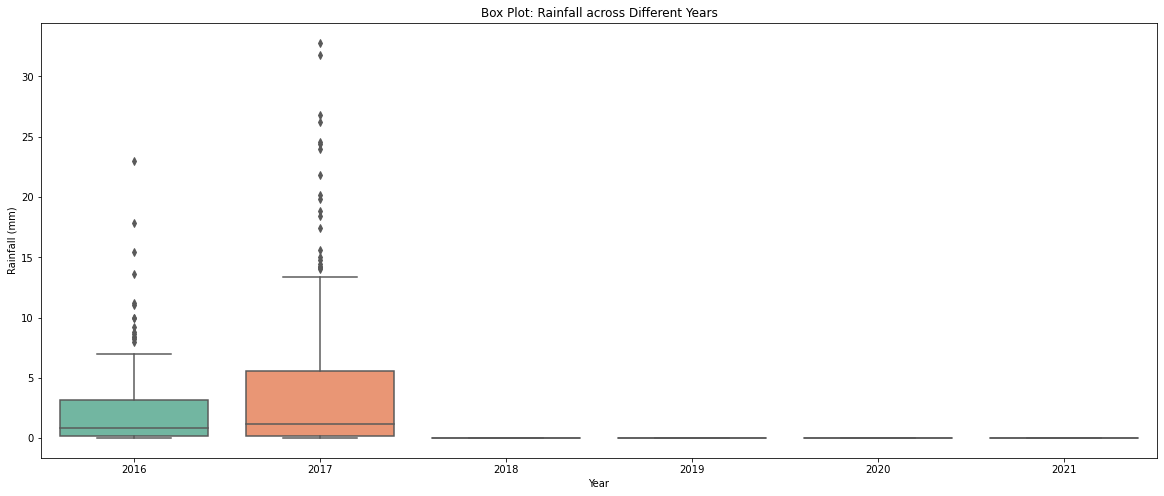

In [105]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Year', y='Rainfall_mm', data=qdata, palette='Set2')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Box Plot: Rainfall across Different Years')
plt.show()

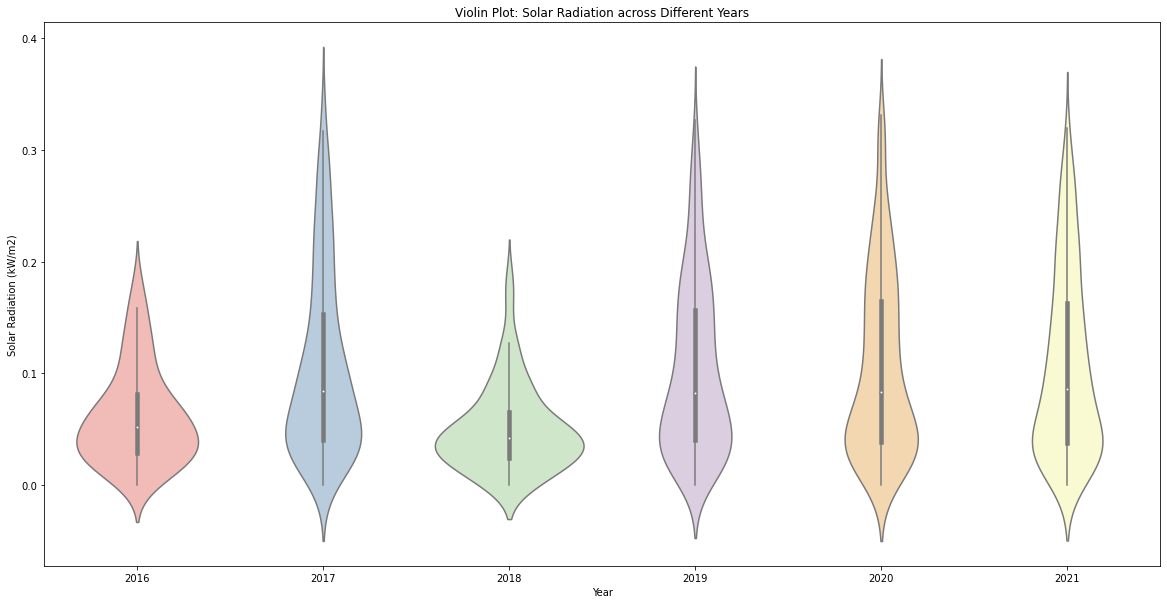

In [106]:
# Violin plots for climatic parameters across different years
plt.figure(figsize=(20,10))
sns.violinplot(x='Year', y='Solar_radiation_kW_per_m2', data=qdata, palette='Pastel1')
plt.xlabel('Year')
plt.ylabel('Solar Radiation (kW/m2)')
plt.title('Violin Plot: Solar Radiation across Different Years')
plt.show()

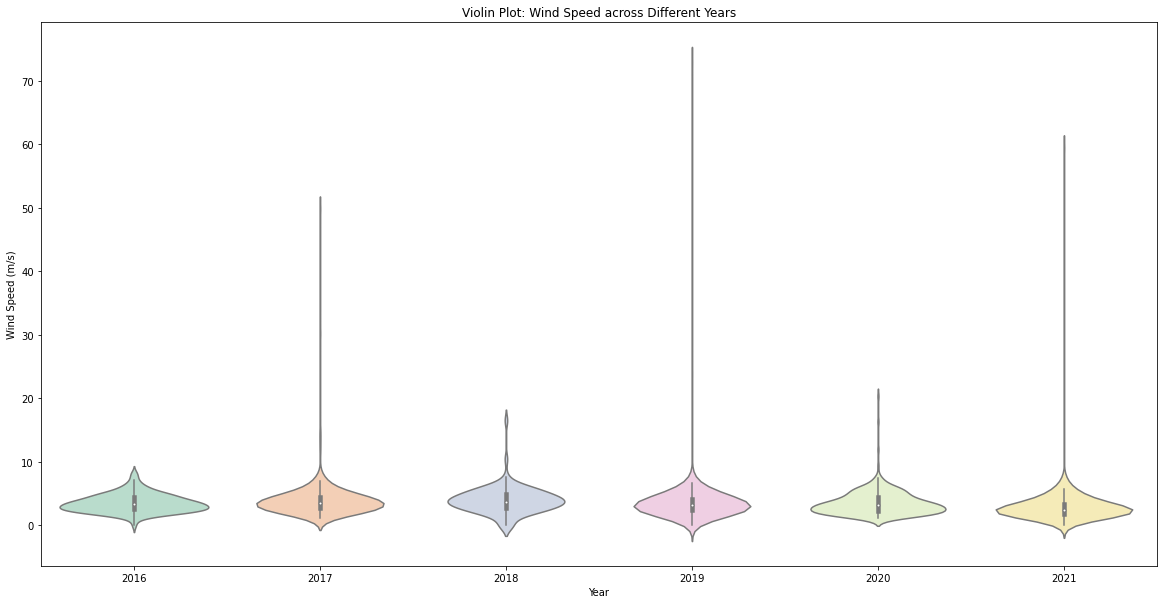

In [107]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Year', y='Wind_speed_m_per_sec', data=qdata, palette='Pastel2')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.title('Violin Plot: Wind Speed across Different Years')
plt.show()

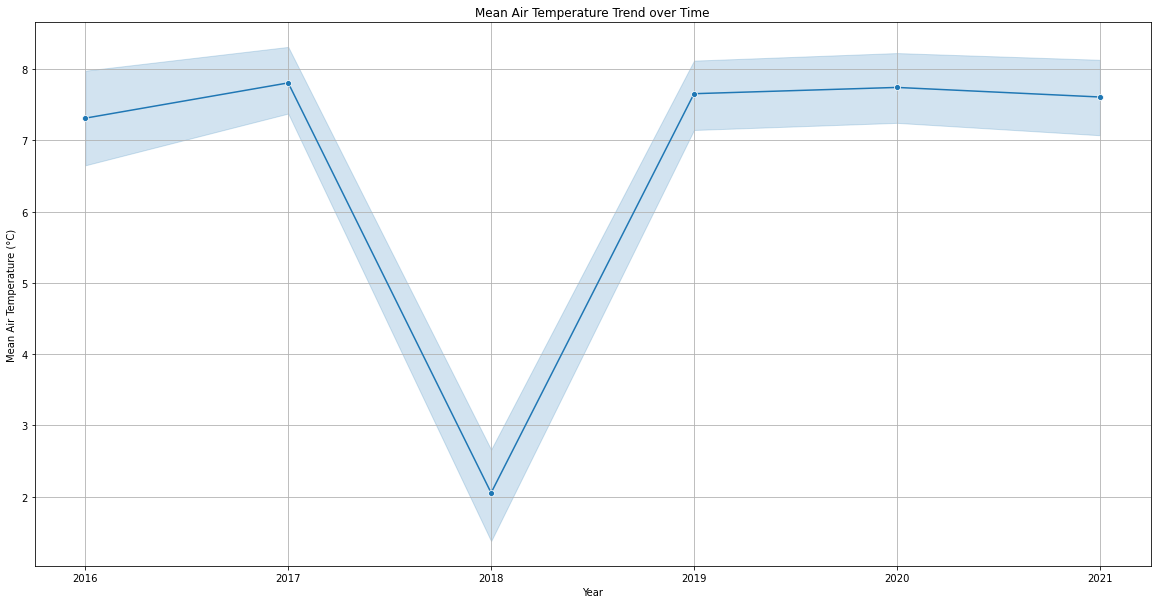

In [108]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year', y='Mean_air_temperature_degC', data=qdata, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Air Temperature (°C)')
plt.title('Mean Air Temperature Trend over Time')
plt.grid(True)
plt.show()

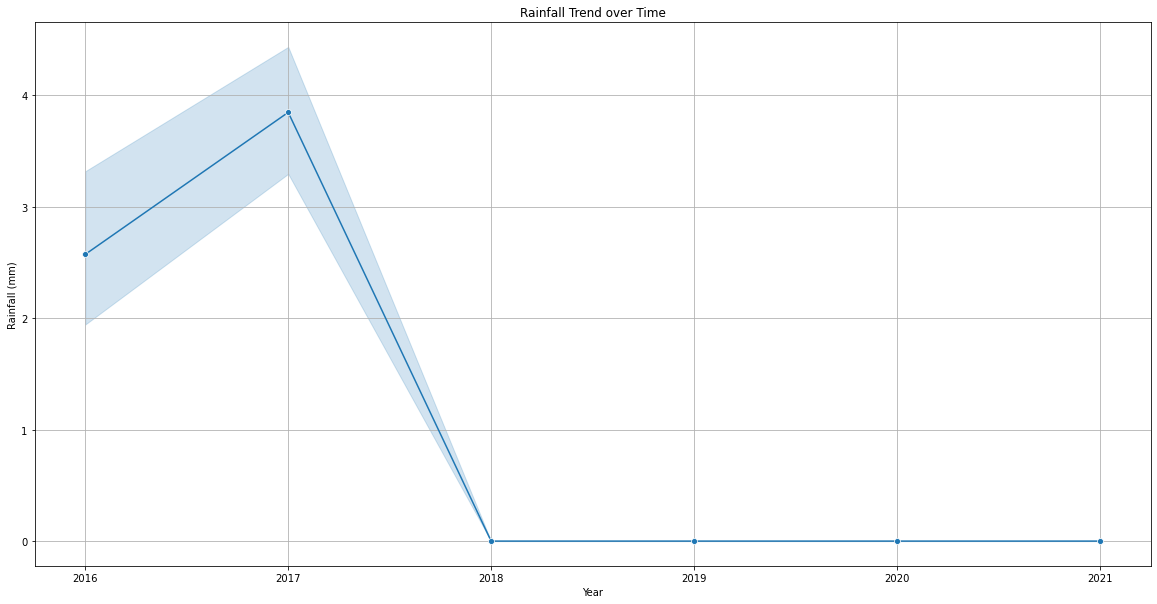

In [109]:
# Line plot for Rainfall over time
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Rainfall_mm', data=qdata, marker='o')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trend over Time')
plt.grid(True)
plt.show()

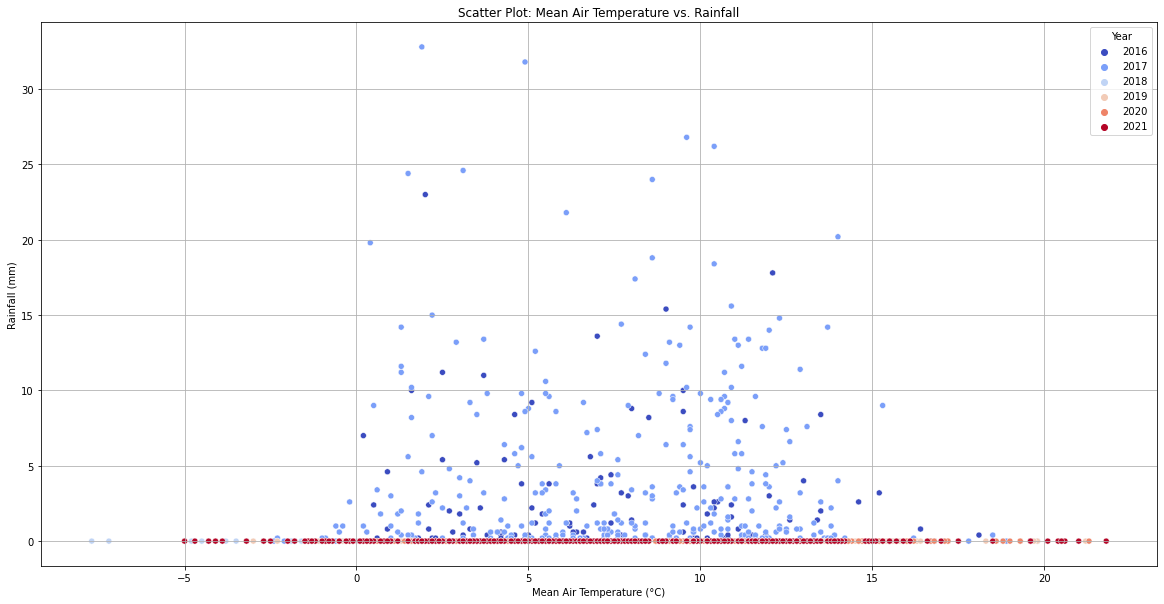

In [110]:
# Scatter plot for Mean Air Temperature vs. Rainfall
plt.figure(figsize=(20,10))
sns.scatterplot(x='Mean_air_temperature_degC', y='Rainfall_mm', data=qdata, hue='Year', palette='coolwarm')
plt.xlabel('Mean Air Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatter Plot: Mean Air Temperature vs. Rainfall')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()

### Data Preprocessing

In [111]:
qdata = qdata.set_index('Date')
qdata = qdata.reindex(time_index)

In [112]:
qdata.head()

,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees,Year,Month,Day
2016-09-01,11.5,8.2,14.3,0.4,766.2,0.158,319.1,4.0,202.9,2016.0,9.0,1.0
2016-09-02,12.6,10.9,14.4,1.4,762.8,0.108,217.4,3.8,199.9,2016.0,9.0,2.0
2016-09-03,12.1,10.1,15.1,17.8,758.4,0.044,78.2,4.8,175.7,2016.0,9.0,3.0
2016-09-04,12.0,10.7,13.6,3.0,759.3,0.081,146.1,3.5,219.3,2016.0,9.0,4.0
2016-09-05,14.6,10.7,17.1,2.6,763.4,0.079,147.0,3.7,185.1,2016.0,9.0,5.0


In [113]:
qdata['Rainfall_mm'] = qdata['Rainfall_mm'].fillna(method='ffill')
qdata['Mean_air_temperature_degC'] = qdata['Mean_air_temperature_degC'].fillna(method='ffill')
qdata['Minimum_air_temperature_degC'] = qdata['Minimum_air_temperature_degC'].fillna(method='ffill')
qdata['Maximum_air_temperature_degC'] = qdata['Maximum_air_temperature_degC'].fillna(method='ffill')
qdata['Air_pressure_mbar'] = qdata['Air_pressure_mbar'].fillna(method='ffill')
qdata['Solar_radiation_kW_per_m2'] = qdata['Solar_radiation_kW_per_m2'].fillna(method='ffill')
qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'] = qdata['Photosynthetic.active.radiation_umol_per_m2_per_sec'].fillna(method='ffill')
qdata['Wind_speed_m_per_sec'] = qdata['Wind_speed_m_per_sec'].fillna(method='ffill')
qdata['Wind_direction_degrees'] = qdata['Wind_direction_degrees'].fillna(method='ffill')

In [114]:
qdata.drop(['Year','Month','Day'],axis=1, inplace=True)

In [115]:
train_size = 0.8  # 80% of the data for training, 20% for testing
train, test = train_test_split(qdata, train_size=train_size, shuffle=False)


In [116]:
features = qdata.columns

In [117]:
scaler = MinMaxScaler()
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [118]:
features

Index(['Mean_air_temperature_degC', 'Minimum_air_temperature_degC',
       'Maximum_air_temperature_degC', 'Rainfall_mm', 'Air_pressure_mbar',
       'Solar_radiation_kW_per_m2',
       'Photosynthetic.active.radiation_umol_per_m2_per_sec',
       'Wind_speed_m_per_sec', 'Wind_direction_degrees'],
      dtype='object')

In [119]:
qdata.columns

Index(['Mean_air_temperature_degC', 'Minimum_air_temperature_degC',
       'Maximum_air_temperature_degC', 'Rainfall_mm', 'Air_pressure_mbar',
       'Solar_radiation_kW_per_m2',
       'Photosynthetic.active.radiation_umol_per_m2_per_sec',
       'Wind_speed_m_per_sec', 'Wind_direction_degrees'],
      dtype='object')

In [120]:
qdata.isnull().sum()

Mean_air_temperature_degC                              0
Minimum_air_temperature_degC                           0
Maximum_air_temperature_degC                           0
Rainfall_mm                                            0
Air_pressure_mbar                                      0
Solar_radiation_kW_per_m2                              0
Photosynthetic.active.radiation_umol_per_m2_per_sec    0
Wind_speed_m_per_sec                                   0
Wind_direction_degrees                                 0
dtype: int64

In [121]:
qdata[qdata['Mean_air_temperature_degC'].isnull()]

,Mean_air_temperature_degC,Minimum_air_temperature_degC,Maximum_air_temperature_degC,Rainfall_mm,Air_pressure_mbar,Solar_radiation_kW_per_m2,Photosynthetic.active.radiation_umol_per_m2_per_sec,Wind_speed_m_per_sec,Wind_direction_degrees


### LSTM

In [122]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data.iloc[i:i + sequence_length].values)
        targets.append(data.iloc[i + sequence_length]['Solar_radiation_kW_per_m2'])
    return np.array(sequences), np.array(targets)

In [123]:
sequence_length = 10

In [124]:

X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)

In [125]:
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, len(features))))
model.add(Dense(1))  # Output layer for predicting the target variable 'Rainfall_mm'

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
49/49 [==============================] - 5s 8ms/step - loss: 0.0264
Epoch 2/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0194
Epoch 3/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 4/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 5/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 6/50
49/49 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 7/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 8/50
49/49 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 9/50
49/49 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 10/50
49/49 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 11/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0174
Epoch 12/50
49/49 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 13/50
49/49 [=============================

In [126]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


In [127]:
X_test

array([[[0.30689655, 0.3880597 , 0.22865854, ..., 0.05898367,
         0.01648352, 0.74048338],
        [0.34137931, 0.37686567, 0.28963415, ..., 0.0316308 ,
         0.04395604, 0.64954683],
        [0.33793103, 0.41044776, 0.26219512, ..., 0.02398237,
         0.04258242, 0.48429003],
        ...,
        [0.45517241, 0.51492537, 0.3902439 , ..., 0.07000259,
         0.07005495, 0.48459215],
        [0.4137931 , 0.49626866, 0.35060976, ..., 0.07778066,
         0.05494505, 0.4347432 ],
        [0.43103448, 0.49253731, 0.37804878, ..., 0.02126005,
         0.06868132, 0.41178248]],

       [[0.34137931, 0.37686567, 0.28963415, ..., 0.0316308 ,
         0.04395604, 0.64954683],
        [0.33793103, 0.41044776, 0.26219512, ..., 0.02398237,
         0.04258242, 0.48429003],
        [0.40689655, 0.45895522, 0.33231707, ..., 0.01335235,
         0.05631868, 0.31722054],
        ...,
        [0.4137931 , 0.49626866, 0.35060976, ..., 0.07778066,
         0.05494505, 0.4347432 ],
        [0.4

In [128]:
test_predictions_1 = model.predict(X_test[[0]])


1/1 [==============================] - 0s 35ms/step


In [129]:
y_test_1 = y_test[0]

In [130]:
test_predictions_1

array([[0.03973245]], dtype=float32)

In [131]:
y_test_1

0.03216374269005847

In [132]:
test_rmse_1 = np.sqrt(mean_squared_error(np.array([y_test_1]), test_predictions_1))
test_mae_1 = mean_absolute_error(np.array([y_test_1]), test_predictions_1)

print("Testing RMSE for day 1:", test_rmse_1)
print("Testing MAE for day 1:", test_mae_1)

Testing RMSE for day 1: 0.007568702341346024
Testing MAE for day 1: 0.007568702341346024


In [133]:
test_predictions_5 = model.predict(X_test[:6])
y_test_5 = y_test[:6]

test_rmse_5 = np.sqrt(mean_squared_error(y_test_5, test_predictions_5))
test_mae_5 = mean_absolute_error(y_test_5, test_predictions_5)

print("Testing RMSE for day 5:", test_rmse_5)
print("Testing MAE for day 5:", test_mae_5)

1/1 [==============================] - 0s 32ms/step
Testing RMSE for day 5: 0.035301928338905955
Testing MAE for day 5: 0.027296004127021184


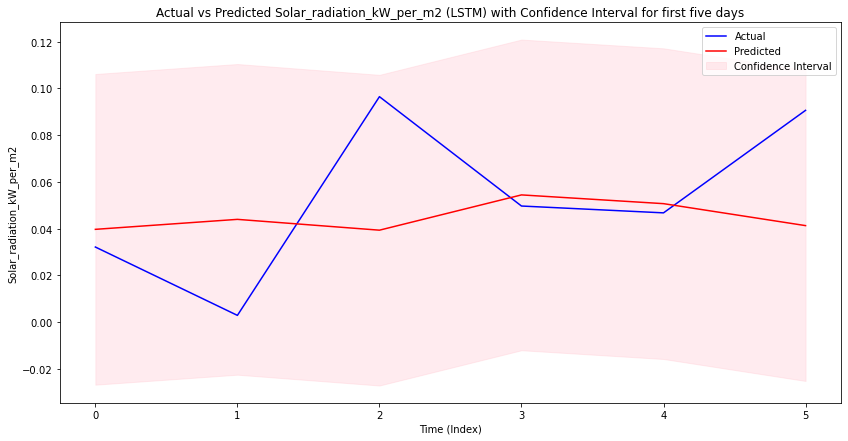

In [134]:
# Calculate Mean Squared Error (MSE) as a measure of uncertainty
mse_5 = np.mean((test_predictions_5 - y_test_5) ** 2)

# Calculate the confidence intervals (upper and lower bounds)
confidence_interval = 1.96 * np.sqrt(mse_5)  # Assuming a 95% confidence level (z-score for 95% confidence level is 1.96)

# Plot the test predictions versus the actual values with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_5)), y_test_5, label='Actual', color='blue')
plt.plot(range(len(y_test_5)), test_predictions_5, label='Predicted', color='red')

# Flatten the arrays for 'y1' and 'y2' in fill_between()
plt.fill_between(range(len(y_test_5)), (test_predictions_5 - confidence_interval).flatten(), (test_predictions_5 + confidence_interval).flatten(), color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time (Index)')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first five days')
plt.legend()
plt.show()

In [135]:
test_predictions_10 = model.predict(X_test[:11])
y_test_10 = y_test[:11]

test_rmse_10 = np.sqrt(mean_squared_error(y_test_10, test_predictions_10))
test_mae_10 = mean_absolute_error(y_test_10, test_predictions_10)

print("Testing RMSE for day 10:", test_rmse_10)
print("Testing MAE for day 10:", test_mae_10)

1/1 [==============================] - 0s 34ms/step
Testing RMSE for day 10: 0.045346948675911526
Testing MAE for day 10: 0.03815015123890695


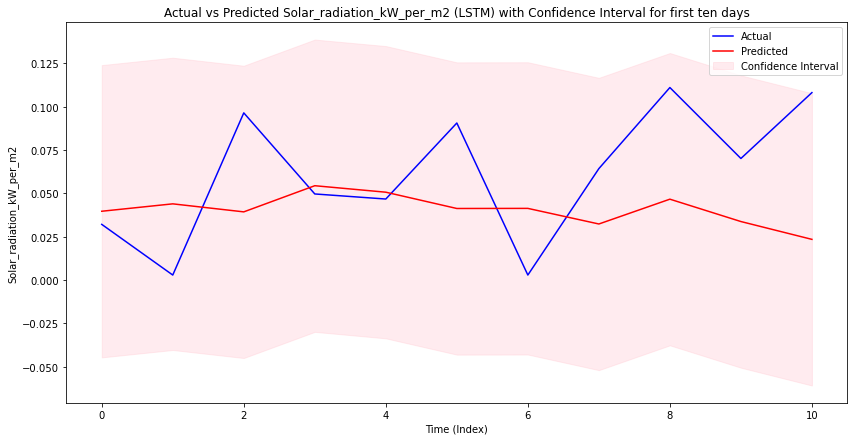

In [136]:
# Calculate Mean Squared Error (MSE) as a measure of uncertainty
mse_10 = np.mean((test_predictions_10 - y_test_10) ** 2)

# Calculate the confidence intervals (upper and lower bounds)
confidence_interval = 1.96 * np.sqrt(mse_10)  # Assuming a 95% confidence level (z-score for 95% confidence level is 1.96)

# Plot the test predictions versus the actual values with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_10)), y_test_10, label='Actual', color='blue')
plt.plot(range(len(y_test_10)), test_predictions_10, label='Predicted', color='red')

# Flatten the arrays for 'y1' and 'y2' in fill_between()
plt.fill_between(range(len(y_test_10)), (test_predictions_10 - confidence_interval).flatten(), (test_predictions_10 + confidence_interval).flatten(), color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time (Index)')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first ten days')
plt.legend()
plt.show()

In [137]:
test_predictions_101 = model.predict(X_test[:101])
y_test_101 = y_test[:101]

test_rmse_101 = np.sqrt(mean_squared_error(y_test_101, test_predictions_101))
test_mae_101 = mean_absolute_error(y_test_101, test_predictions_101)

print("Testing RMSE for day 100:", test_rmse_101)
print("Testing MAE for day 100:", test_mae_101)

4/4 [==============================] - 0s 4ms/step
Testing RMSE for day 100: 0.08072971588150914
Testing MAE for day 100: 0.06285854232232259


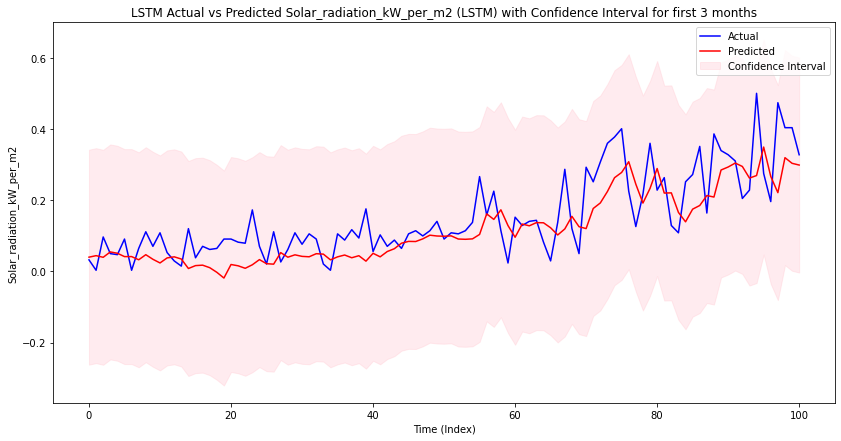

In [138]:
# Calculate Mean Squared Error (MSE) as a measure of uncertainty
mse_101 = np.mean((test_predictions_101 - y_test_101) ** 2)

# Calculate the confidence intervals (upper and lower bounds)
confidence_interval = 1.96 * np.sqrt(mse_101)  # Assuming a 95% confidence level (z-score for 95% confidence level is 1.96)

# Plot the test predictions versus the actual values with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_101)), y_test_101, label='Actual', color='blue')
plt.plot(range(len(y_test_101)), test_predictions_101, label='Predicted', color='red')

# Flatten the arrays for 'y1' and 'y2' in fill_between()
plt.fill_between(range(len(y_test_101)), (test_predictions_101 - confidence_interval).flatten(), (test_predictions_101 + confidence_interval).flatten(), color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time (Index)')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('LSTM Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first 3 months')
plt.legend()
plt.show()

In [139]:
test_predictions_184 = model.predict(X_test[:184])
y_test_184 = y_test[:184]

test_rmse_184 = np.sqrt(mean_squared_error(y_test_184, test_predictions_184))
test_mae_184 = mean_absolute_error(y_test_184, test_predictions_184)

print("Testing RMSE for day 180:", test_rmse_184)
print("Testing MAE for day 180:", test_mae_184)

6/6 [==============================] - 0s 4ms/step
Testing RMSE for day 180: 0.1435817334087537
Testing MAE for day 180: 0.10622659526584076


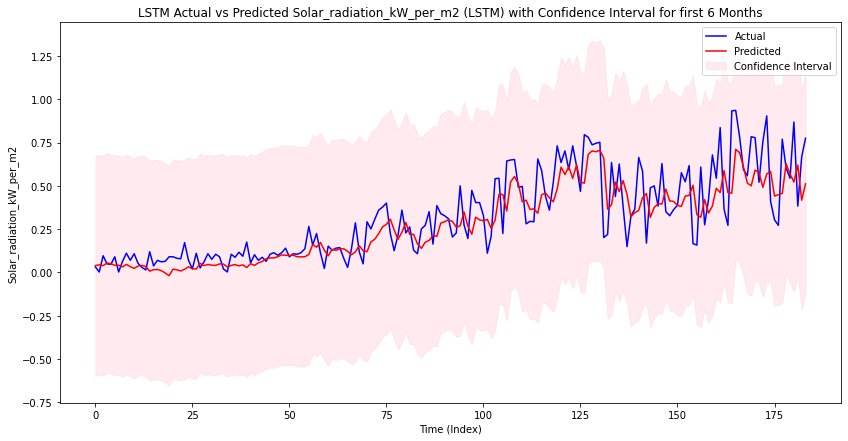

In [140]:
# Calculate Mean Squared Error (MSE) as a measure of uncertainty
mse = np.mean((test_predictions_184 - y_test_184) ** 2)

# Calculate the confidence intervals (upper and lower bounds)
confidence_interval = 1.96 * np.sqrt(mse)  # Assuming a 95% confidence level (z-score for 95% confidence level is 1.96)

# Plot the test predictions versus the actual values with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test_184)), y_test_184, label='Actual', color='blue')
plt.plot(range(len(y_test_184)), test_predictions_184, label='Predicted', color='red')

# Flatten the arrays for 'y1' and 'y2' in fill_between()
plt.fill_between(range(len(y_test_184)), (test_predictions_184 - confidence_interval).flatten(), (test_predictions_184 + confidence_interval).flatten(), color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time (Index)')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('LSTM Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first 6 Months')
plt.legend()
plt.show()

In [141]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)

In [142]:
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)

Training RMSE: 0.12585521428073163
Testing RMSE: 0.14058159783877508
Testing MAE: 0.10501189688726553


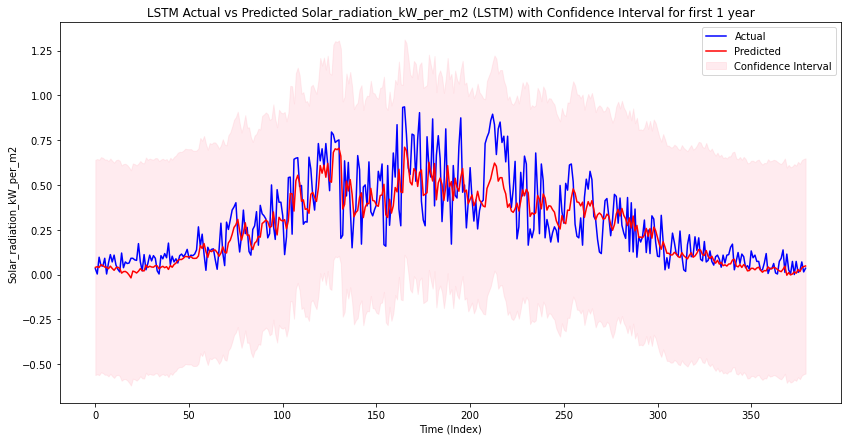

In [143]:
# Calculate Mean Squared Error (MSE) as a measure of uncertainty
mse = np.mean((test_predictions - y_test) ** 2)

# Calculate the confidence intervals (upper and lower bounds)
confidence_interval = 1.96 * np.sqrt(mse)  # Assuming a 95% confidence level (z-score for 95% confidence level is 1.96)

# Plot the test predictions versus the actual values with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_test)), test_predictions, label='Predicted', color='red')

# Flatten the arrays for 'y1' and 'y2' in fill_between()
plt.fill_between(range(len(y_test)), (test_predictions - confidence_interval).flatten(), (test_predictions + confidence_interval).flatten(), color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Time (Index)')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('LSTM Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first 1 year')
plt.legend()
plt.show()

### ARIMA

In [144]:
df = df[600:]

In [145]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')  # Daily frequency
df_reindexed = df.reindex(date_range)

# Step 2: Fill missing values (choose the appropriate method)
# Method 1: Fill missing values with forward fill (use the last valid observation to fill)
df_filled = df_reindexed.fillna(method='ffill')

In [146]:
# Assuming the original data is in a DataFrame called 'df'
data = df[['Date', 'Solar_radiation_kW_per_m2']].copy()
data.set_index('Date', inplace=True)

In [147]:
df = df.groupby('Date')['Solar_radiation_kW_per_m2'].sum().reset_index()

In [148]:
df.dtypes

Date                         datetime64[ns]
Solar_radiation_kW_per_m2           float64
dtype: object

In [149]:
# Train-test split (80% for training, 20% for testing)
train_size = 0.8
train_size_index = int(len(data) * train_size)
train_data = data.iloc[:train_size_index]
test_data = data.iloc[train_size_index:]

In [150]:
p=d=q = range(0,2)

In [151]:
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [152]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [153]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [154]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-19', '2019-01-20', '2019-01-21',
               '2019-01-22', '2019-01-23',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1062, freq=None)

In [155]:
y = df['Solar_radiation_kW_per_m2'].resample('MS').mean()

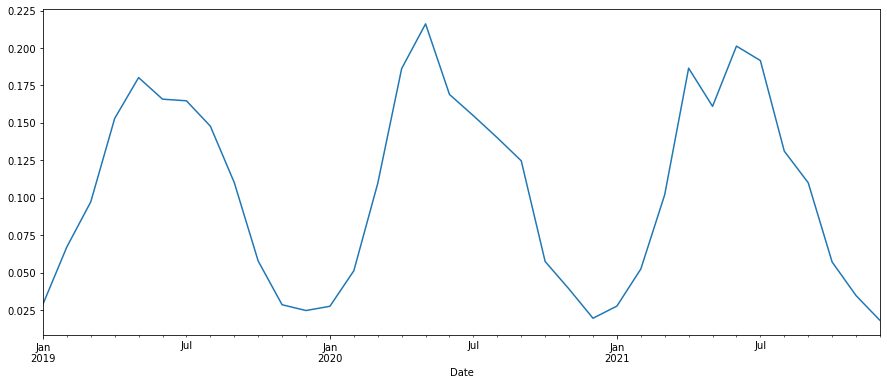

In [156]:
y.plot(figsize=(15, 6))
plt.show()

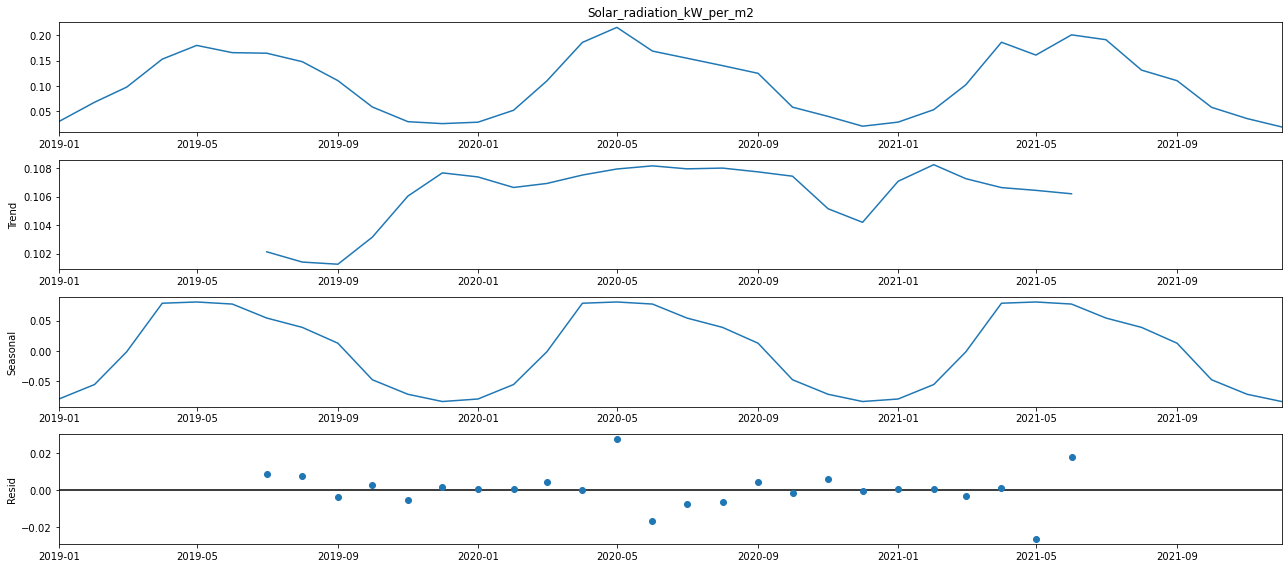

In [157]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [158]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-44.73988534245732
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-37.51876605708792
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-112.8604185954416


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for va

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-51.58864541032556
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-117.17440955561403
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-113.92315098584477
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-58.36366782450217


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-50.21194209375375
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-80.35674573966286


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-56.49046541427276
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-105.72745951518621


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-46.45723241403025
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-115.29497324630051


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-104.93435191593993
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-57.98374978012545


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-44.151701871370065
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-123.60659999046648
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-78.86226339802008


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-93.44242046171132
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-36.270919230349634


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-97.31709151905322


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-91.96779780148087
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-42.2402472893324


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-35.27648623375013
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-124.66456607326475


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-74.80258137106628
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-98.04454762313625


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-36.94624258931136
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-105.97030139554138


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-97.79645720415421
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-47.98396730921591


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-35.32647051168891
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-126.14718338557535
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-81.94617768013678


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-110.96410358154648
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-50.459260701366034
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-109.20477693189578


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-112.03990918130934
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-51.04107482719668


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-49.04121256809739
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-128.127714222091
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-76.27615640702317


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-103.50959395087781


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-44.87546308770807
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-108.87580491429448


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-104.91812144176757
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-50.64476146390847


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-42.5817206866733
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-131.54807022818912


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-78.01813780846805
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-93.6123745011329


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-36.898115655986594
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-91.9266930395067


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-93.01027385924839


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-38.59885924600421
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-36.59896719481817
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-124.75724006019337


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-72.80280525799851


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-96.23850238027975
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-35.77513289247273
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-98.09387735000125


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-95.86993299830813


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-41.4151529301261
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-33.90630973468359


In [159]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4976      0.135      3.698      0.000       0.234       0.761
sigma2         0.0011      0.000      3.545      0.000       0.000       0.002


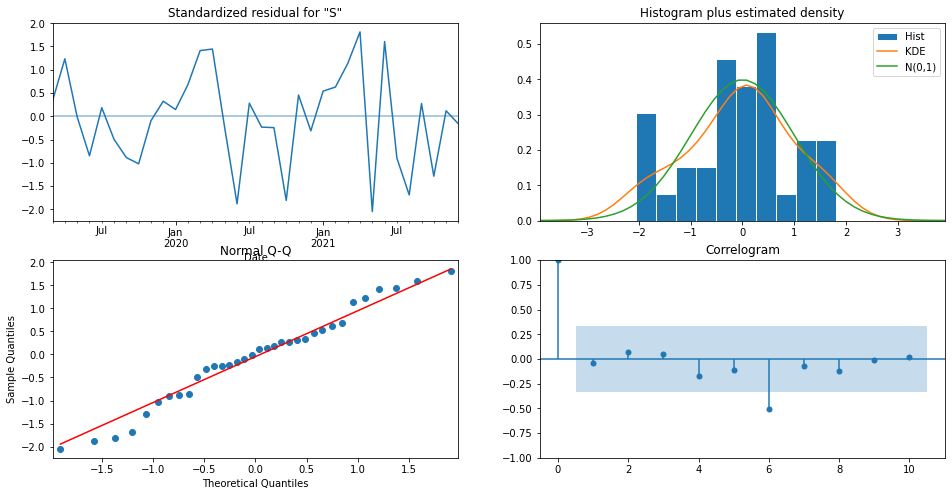

In [160]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

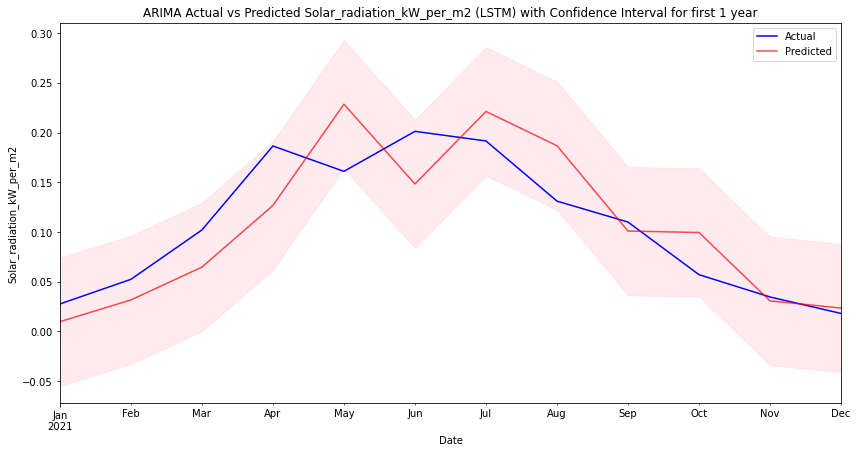

In [161]:
# Make predictions
pred = results.get_prediction(start=pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# Plot actual and predicted values
ax = y['2021':].plot(label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7), color='red')

# Fill the confidence interval area
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.title('ARIMA Actual vs Predicted Solar_radiation_kW_per_m2 (LSTM) with Confidence Interval for first 1 year')

ax.set_xlabel('Date')
ax.set_ylabel('Solar_radiation_kW_per_m2')
plt.legend()
plt.show()

In [162]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]

mse_1yr = ((y_forecasted - y_truth) ** 2).mean()
mae_1yr = np.abs(y_forecasted - y_truth).mean()
rmse_1yr = np.sqrt(((y_forecasted - y_truth) ** 2).mean())

print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_1yr)


print('The Mean Squared Error of our forecasts is {}'.format(mse))
print("Mean Absolute Error (MAE) for ARIMA:", mae_1yr)

Root Mean Squared Error (RMSE) for ARIMA: 0.03978219568534113
The Mean Squared Error of our forecasts is 0.09388497644577787
Mean Absolute Error (MAE) for ARIMA: 0.033525326657808295


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) for the first five days: 0.008516519993396438
Mean Absolute Error (MAE) for the first 5 days: 0.005678001511534967


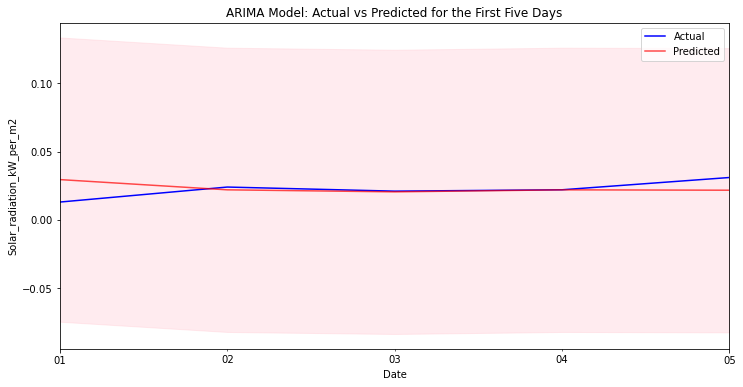

In [177]:
# Step 3: Make predictions for the first five days
forecast_start = pd.to_datetime('2021-01-01')
forecast_end = pd.to_datetime('2021-01-05')
pred = results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end), dynamic=False)
pred_ci = pred.conf_int()

# Step 4: Evaluate the performance of the model
mse = mean_squared_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE) for the first five days: {rmse}")
mae_5 =  mean_absolute_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)

print(f"Mean Absolute Error (MAE) for the first 5 days: {mae_5}")

# Step 5: Plot the actual and predicted values for the first five days
plt.figure(figsize=(12, 6))
ax = test_data.loc[forecast_start:forecast_end, 'Solar_radiation_kW_per_m2'].plot(label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, color='red')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)

# Customize date format for x-axis to show only the day
date_format = mdates.DateFormatter('%d')  # Display only the day
ax.xaxis.set_major_formatter(date_format)


#plt.title('ARIMA Actual vs Predicted Solar_radiation_kW_per_m2  with Confidence Interval for first 5 days'
plt.xlabel('Date')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('ARIMA Model: Actual vs Predicted for the First Five Days')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) for the first five days: 0.014142785248253414
Mean Absolute Error (MAE) for the first 10 days: 0.009266619226151431


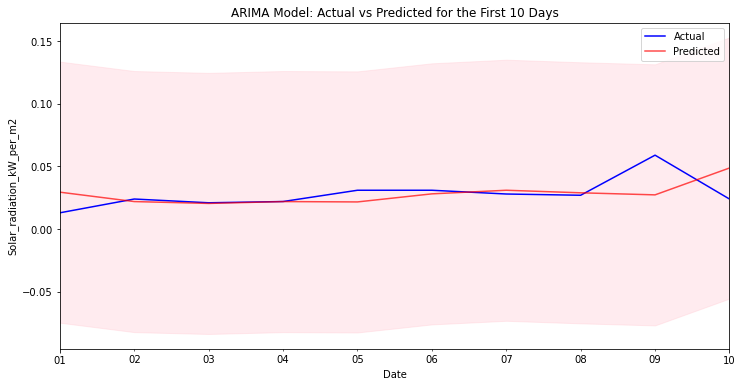

In [178]:
# Step 3: Make predictions for the first five days
forecast_start = pd.to_datetime('2021-01-01')
forecast_end = pd.to_datetime('2021-01-10')
pred = results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end), dynamic=False)
pred_ci = pred.conf_int()

# Step 4: Evaluate the performance of the model
mse = mean_squared_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE) for the first five days: {rmse}")
mae_10 =  mean_absolute_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)

print(f"Mean Absolute Error (MAE) for the first 10 days: {mae_10}")

# Step 5: Plot the actual and predicted values for the first five days
plt.figure(figsize=(12, 6))
ax = test_data.loc[forecast_start:forecast_end, 'Solar_radiation_kW_per_m2'].plot(label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, color='red')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)

# Customize date format for x-axis to show only the day
date_format = mdates.DateFormatter('%d')  # Display only the day
ax.xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('ARIMA Model: Actual vs Predicted for the First 10 Days')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) for the first 100 days: 0.03901386273139983
Mean Absolute Error (MAE) for the first 100 days: 0.026889892203731978


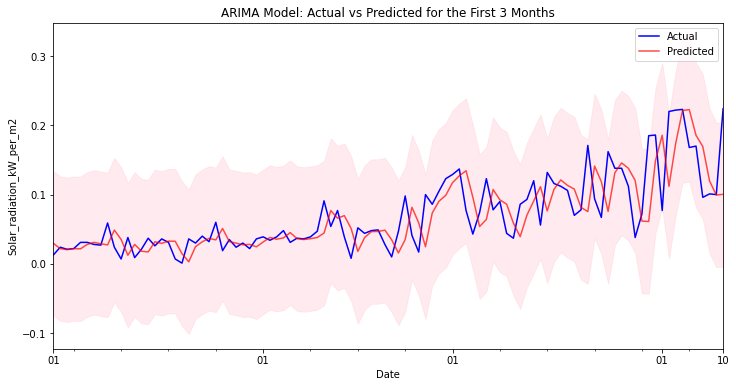

In [179]:
# Step 3: Make predictions for the first five days
forecast_start = pd.to_datetime('2021-01-01')
forecast_end = pd.to_datetime('2021-04-10')
pred = results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end), dynamic=False)
pred_ci = pred.conf_int()

# Step 4: Evaluate the performance of the model
mse = mean_squared_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
rmse = mse ** 0.5
mae_100 =  mean_absolute_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
print(f"Root Mean Squared Error (RMSE) for the first 100 days: {rmse}")
print(f"Mean Absolute Error (MAE) for the first 100 days: {mae_100}")
# Step 5: Plot the actual and predicted values for the first five days
plt.figure(figsize=(12, 6))
ax = test_data.loc[forecast_start:forecast_end, 'Solar_radiation_kW_per_m2'].plot(label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, color='red')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)

# Customize date format for x-axis to show only the day
date_format = mdates.DateFormatter('%d')  # Display only the day
ax.xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('ARIMA Model: Actual vs Predicted for the First 3 Months')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE) for the first 100 days: 0.061484298589517206
Mean Absolute Error (MAE) for the first 100 days: 0.04396955763525374


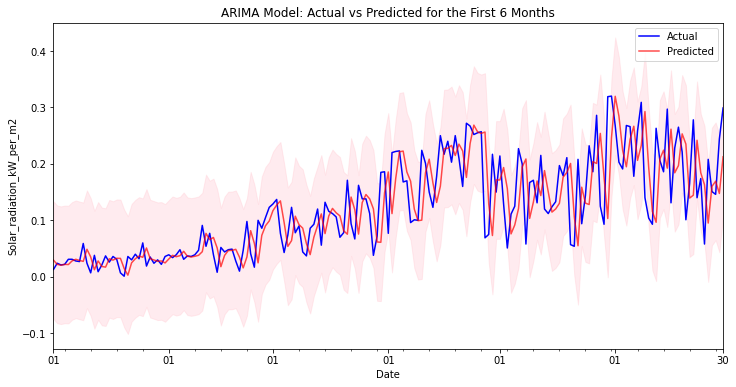

In [180]:
# Step 3: Make predictions for the first five days
forecast_start = pd.to_datetime('2021-01-01')
forecast_end = pd.to_datetime('2021-06-30')
pred = results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end), dynamic=False)
pred_ci = pred.conf_int()

# Step 4: Evaluate the performance of the model
mse = mean_squared_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
rmse = mse ** 0.5
mae_100 =  mean_absolute_error(test_data.loc[forecast_start:forecast_end]['Solar_radiation_kW_per_m2'], pred.predicted_mean)
print(f"Root Mean Squared Error (RMSE) for the first 100 days: {rmse}")
print(f"Mean Absolute Error (MAE) for the first 100 days: {mae_100}")
# Step 5: Plot the actual and predicted values for the first five days
plt.figure(figsize=(12, 6))
ax = test_data.loc[forecast_start:forecast_end, 'Solar_radiation_kW_per_m2'].plot(label='Actual', color='blue')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, color='red')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)

# Customize date format for x-axis to show only the day
date_format = mdates.DateFormatter('%d')  # Display only the day
ax.xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Solar_radiation_kW_per_m2')
plt.title('ARIMA Model: Actual vs Predicted for the First 6 Months')
plt.legend()
plt.show()